In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
DF = sns.load_dataset('mpg')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
DF1 = DF[['mpg','cylinders', 'displacement','weight']]

In [5]:
DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


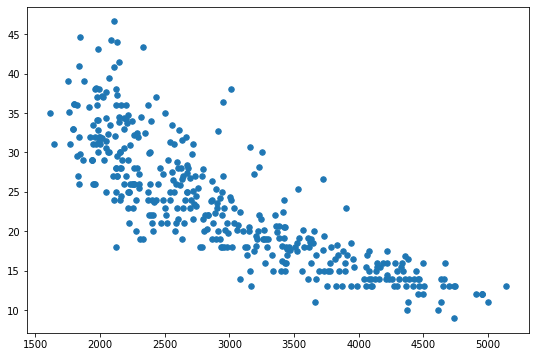

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter (x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

In [8]:
import seaborn as sns

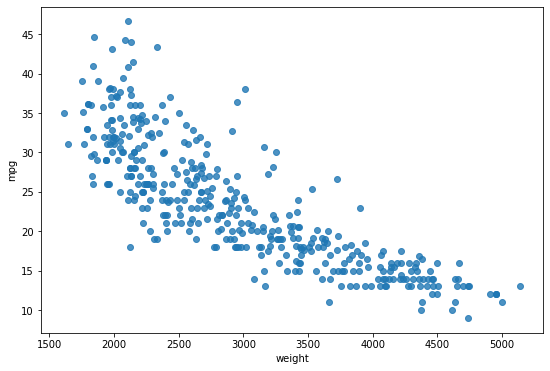

In [10]:
fig = plt.figure(figsize = (9, 6))

sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = False)
plt.show()

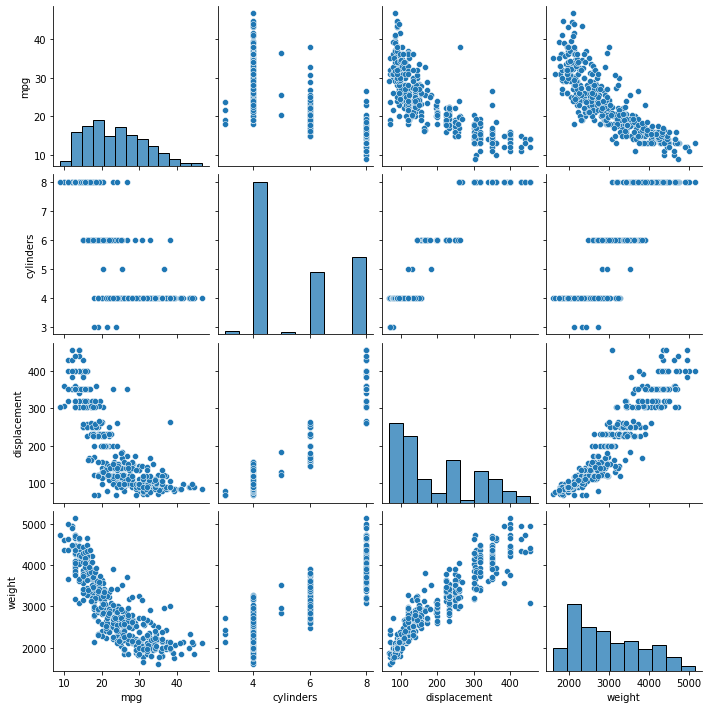

In [11]:
sns.pairplot(DF1)
plt.show()

In [14]:
from scipy import stats
stats.pearsonr(DF1.mpg, DF1.weight)[0]

PearsonRResult(statistic=-0.831740933244335, pvalue=2.9727995640496354e-103)

In [17]:
stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.8042028248058978

In [20]:
stats.pearsonr(DF.mpg, DF1.cylinders)[0]

-0.7753962854205542

In [33]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 2045)

In [34]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278, 1)
Test Data :  (120, 1) (120, 1)


In [35]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

In [36]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [[-0.00766168]]
bias(b) :  [46.28223639]


In [37]:
RA.score(X_test, y_test)

0.7164499678296495

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
y_hat = RA.predict(X_test)
mean_squared_error(y_test, y_hat)

17.01518447782976

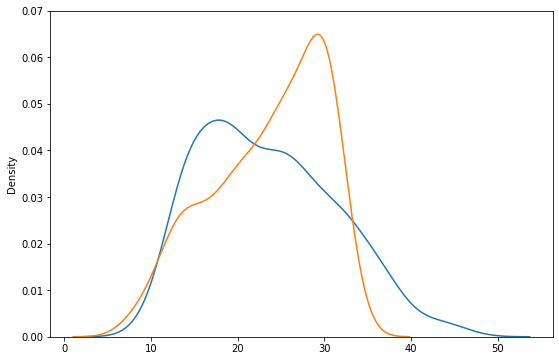

In [43]:
y_hat1 = RA.predict(X)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat1, hist = False, label='y_hat', ax = ax1)
plt.ylim(0, 0.07)
plt.show()

In [44]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]
DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


In [45]:
X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

In [48]:
print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


In [49]:
from sklearn.linear_model import LinearRegression
NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
import numpy as np
np.set_printoptions(suppress = True, precision = 10)
print('weight(w) : ', NL.coef_)
print('bias(b) : ', '%.8f' % NL.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


In [51]:
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, y_test)

0.7525521808321769

In [52]:
X_test_poly = poly.fit_transform(X_test)
mean_squared_error(y_test, NL.predict(X_test_poly))

14.848773810921921

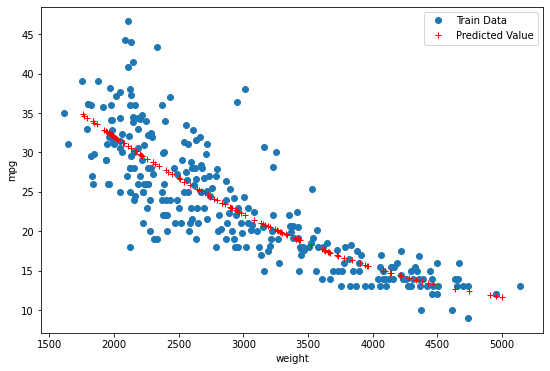

In [53]:
y_hat_test = NL.predict(X_test_poly)
plt.figure(figsize = (9,6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [75]:
X_poly = poly.fit_transform(X_test)
y_hat2 = NL.predict(X_poly)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat2, hist=False, label="y_hat", ax=ax1)
plt.ylim(0, 0.07)
plt.show()

ValueError: ignored

In [55]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']]
DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


In [56]:
from sklearn.model_selection import train_test_split
X = DF3[['displacement', 'weight']]
y = DF3['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3,
random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


In [58]:
from sklearn.linear_model import LinearRegression
MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression()

In [59]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.74652237


In [60]:
MR.score(X_test, y_test)

0.720971246285159

In [62]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

16.743872969214195

In [63]:
y_hat3 = MR.predict(X_test)
plt.figure(figsize = (9, 6))

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

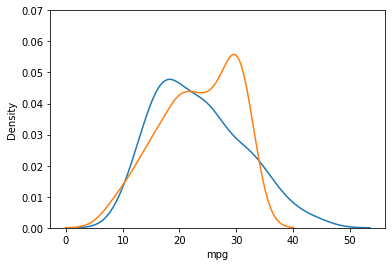

In [68]:
ax1 = sns.distplot(y_test, hist = False, label ='y_test')
ax2 = sns.distplot(y_hat3, hist =False, label='y_hat', ax = ax1)

plt.ylim(0, 0.07)
plt.show()

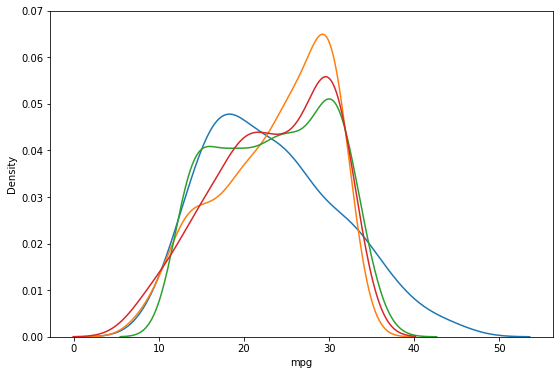

In [71]:
y_hat3 = MR.predict(X_test)
plt.figure(figsize = (9,6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat1, hist =False, label='y_hat', ax = ax1)
ax3 = sns.distplot(y_hat2, hist =False, label='y_hat', ax = ax1)
ax4 = sns.distplot(y_hat3, hist =False, label='y_hat', ax = ax1)
plt.ylim(0,0.07)
plt.show()